# Source and Data Description
__[CDC Website](https://www.cdc.gov/nchs/hus/data-finder.htm?year=2019)__ , Figure 005

The data details the victims of suicide in the US, categorizing them by sex and means. It spans 2008-2018.
Note that the __[Raw Data](./rawdata.xlsx)__ is taken directly from the website, whereas __[Data_Percent_Shares](./data_percent_shares.xlsx)__ and __[Death_Rates](./death_rates.xlsx) were manually created by reformatting the data for easier imports. Note that the data already uses aggregates, as opposed to most dataframes that would use individual data entries. This provides an interesting exercise in EDA.

# Imports

## Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Datasets

In [2]:
df1 = pd.read_excel('data_cause_percent_shares.xlsx')
df2 = pd.read_excel('death_rates.xlsx')

# Basic Dataset Cleaning

In [3]:
df1.head(3)

,Year,Sex,Firearm,SE,Suffocation,SE.1,Poisoning,SE.2,Other,SE.3
0,2008,Male,56.0,0.29,24.6,0.26,12.2,0.19,7.3,0.15
1,2009,Male,56.1,0.29,25.1,0.25,11.8,0.19,7.0,0.15
2,2010,Male,56.0,0.29,25.1,0.25,11.8,0.19,7.1,0.15


In [4]:
df2.head(3)

,Year,Total,SE,Male,SE.1,Female,SE.2
0,2008,11.6,0.06,19.0,0.11,4.8,0.06
1,2009,11.8,0.06,19.2,0.11,4.9,0.06
2,2010,12.1,0.06,19.8,0.12,5.0,0.06


In [5]:
# Note that the SE columns above are for standard errors. For the sake of simplicity, we will not use them in this notebook.
df1 = df1.drop(['SE','SE.1', 'SE.2', 'SE.3'], axis=1)
df2 = df2.drop(['SE', 'SE.1', 'SE.2'], axis=1)

In [6]:
df1.head(3)

,Year,Sex,Firearm,Suffocation,Poisoning,Other
0,2008,Male,56.0,24.6,12.2,7.3
1,2009,Male,56.1,25.1,11.8,7.0
2,2010,Male,56.0,25.1,11.8,7.1


In [7]:
df2.head(3)

,Year,Total,Male,Female
0,2008,11.6,19.0,4.8
1,2009,11.8,19.2,4.9
2,2010,12.1,19.8,5.0


In [8]:
#We also rename the columns with different capitalization to make them easier to work with
df1.columns = df1.columns.str.lower()
df2.columns = df2.columns.str.lower()

# EDA

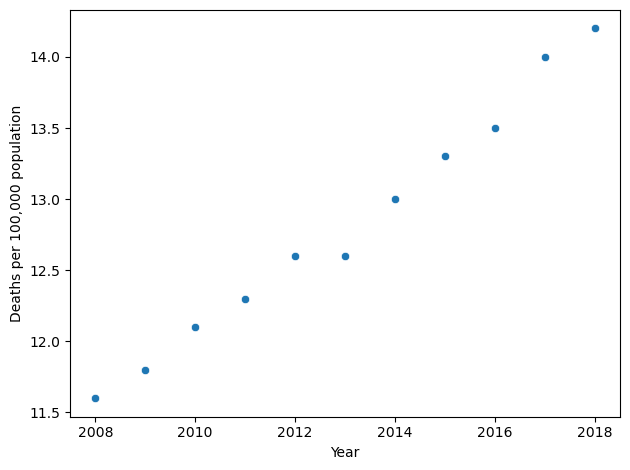

In [9]:
sns.scatterplot(df2, x='year', y='total')
plt.xlabel('Year')
plt.ylabel('Deaths per 100,000 population')
plt.tight_layout()
plt.show()

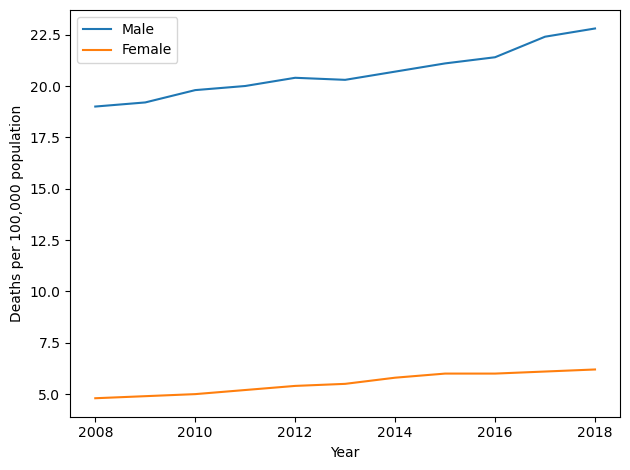

In [10]:
plt.plot(df2['year'], df2['male'], label='Male')
plt.plot(df2['year'], df2['female'], label='Female')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Deaths per 100,000 population')
plt.tight_layout()
plt.show()

In [11]:
#for convenience, we create a function sex_year_plot that shall provide a countplot of the causes of suicide for a specified sex and year
def sex_year_plot(sex, year):
    dfs = df1[df1['sex']==sex]
    dfs = dfs[dfs['year']==year]
    fcount = int(list(dfs['firearm'])[0])
    scount = int(list(dfs['suffocation'])[0])
    pcount = int(list(dfs['poisoning'])[0])
    ocount = int(list(dfs['other'])[0])
    lst = []
    for i in range(fcount): lst.append('firearm')
    for i in range(scount): lst.append('suffocation')
    for i in range(pcount): lst.append('poisoning')
    for i in range(ocount): lst.append('other')
    dfn = pd.DataFrame(lst, columns=['cause'])
    sns.countplot(dfn, x='cause')
    plt.title(f'Method of Suicide for {sex}s in {year}')
    plt.xlabel('Method of Suicide')
    plt.ylabel('Percentage of Suicides')


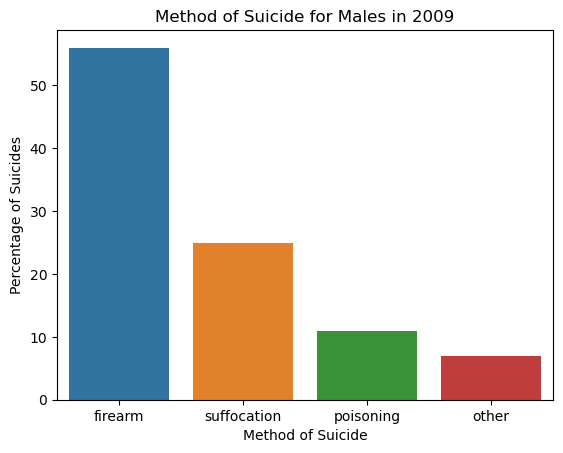

In [12]:
sex_year_plot('Male', 2009)

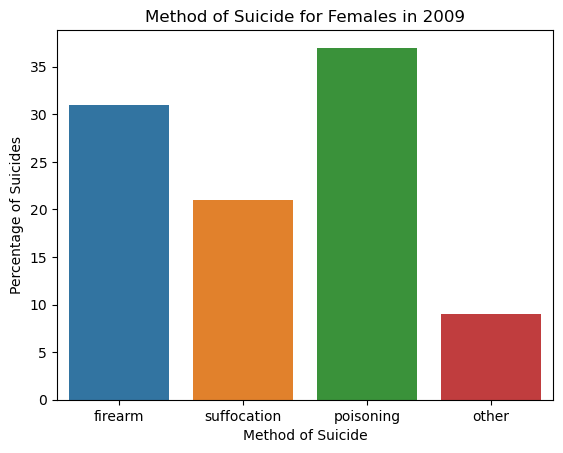

In [13]:
sex_year_plot('Female', 2009)

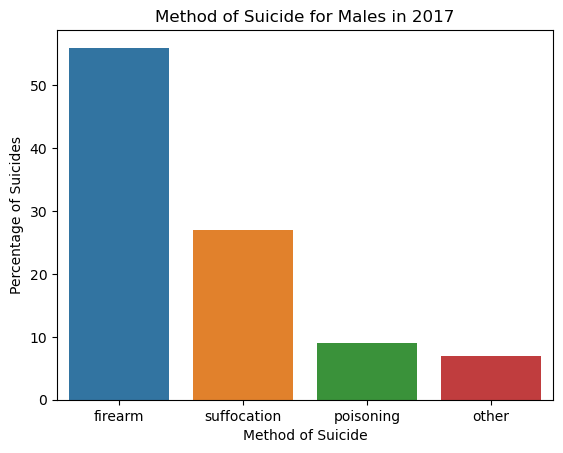

In [14]:
sex_year_plot('Male', 2017)

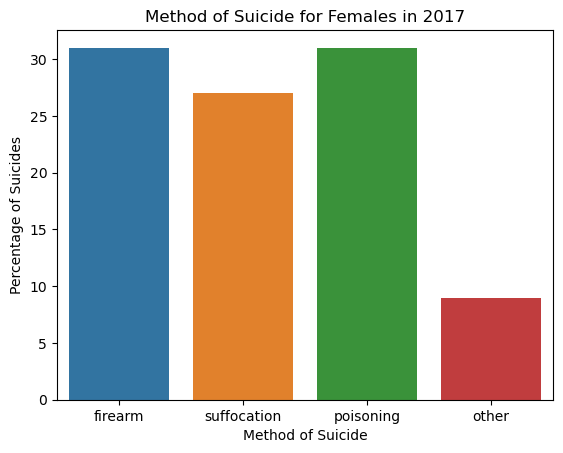

In [15]:
sex_year_plot('Female', 2017)

In [27]:
#for convenience, we create a second function to graph the percentage of specific causes of suicides with respect to time
def sex_cause_plot(sex, cause):
    cause = cause.lower()
    years = [i for i in range(2008, 2019)]
    dfs = df1[df1['sex']==sex]
    match cause:
        case 'firearm':
            lst = [rows.firearm for index, rows in dfs.iterrows()]
        case 'suffocation':
            lst = [rows.suffocation for index, rows in dfs.iterrows()]
        case 'poisoning':
            lst = [rows.poisoning for index, rows in dfs.iterrows()]
        case 'other':
            lst = [rows.other for index, rows in dfs.iterrows()]
    plt.plot(years, lst)

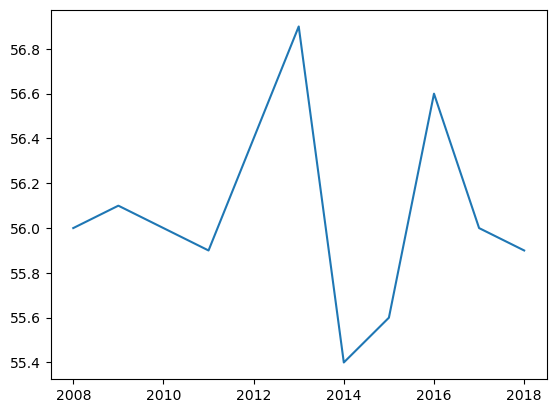

In [29]:
sex_cause_plot('Male', 'Firearm')

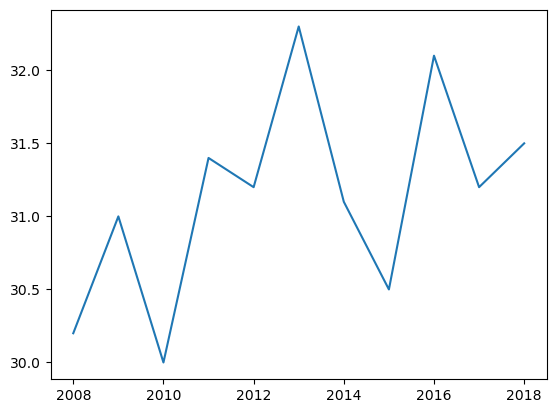

In [30]:
sex_cause_plot('Female', 'Firearm')

# Conclusion
For the lack of further data, such as overall population demographics, regions, etc., we choose not to train a model on this dataset. We do, however, design rudimentary functions to quickly access relevant statistics from the dataset.